# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework<a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2019/20.


- This is independent work, you cannot work in groups.


- Each question below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm (e.g. from SciPy) not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.


<br><br>

# DEADLINE:   5pm Sunday 5 Jan 2020 
# Baku : 5th Jan 21:00 
<a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl
#time
from time import time

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.  ✅

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5.  ✅

<br>

Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6:  ✅

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider a simple error metric given by the error in the solution at time $t=3$.  ✅

<br>

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.  ✅

<br>

Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.   ✅

<br>

What is the optimal value of $\alpha$ which minimises the error for this problem?  ✅

## Setting up the functions

In [28]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max: 
        k1 = f(t, y)
        k2 = f(t+alpha*dt, y+alpha*dt*k1)
        y = y + (1-1/(2*alpha))*dt*k1 + (1/(2*alpha))*dt*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)
    
def f(t, y): #k1
    return y + t**3

def y_ex(t): #exact solution
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6  

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt*f(t, u)  # euler guess
        u = u + 0.5*dt* ( f(t, u) + f(t + dt, ue) )
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)


## Verification Test : 
Confirmed that with the choice of $\alpha=1$ my implementation agrees with results from the improved Euler.

Also implemented another graph with $\alpha=0.5$ to observe the performance of other methods with each other.



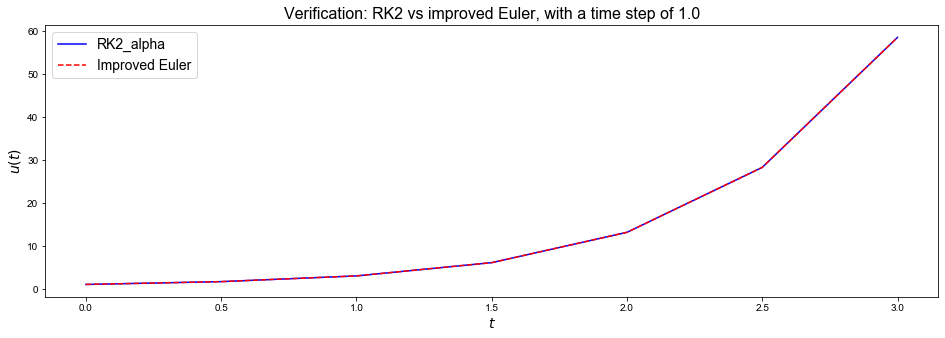

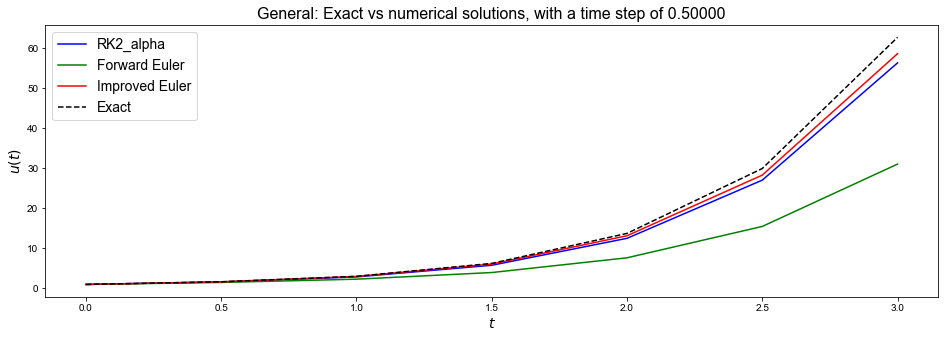

In [29]:
# problem parameters
dt = 0.5
y0 = 1.0
t0 = 0.0
t_max = 3

# setting up figure for verification with timestep of 1.0
fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))

uall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 1)
ax1.plot(tall, uall, 'b', label='RK2_alpha')

uall, tall = improved_euler(f, y0, t0, t_max, dt)
ax1.plot(tall, uall, 'r--', label='Improved Euler')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('Verification: RK2 vs improved Euler, with a time step of 1.0'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

# set up  general figure with timestep of 0.5
fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))

uall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 0.5)
ax1.plot(tall, uall, 'b', label='RK2_alpha')

uall, tall = forward_euler(f, y0, t0, t_max, dt)
ax1.plot(tall, uall, 'g', label='Forward Euler')

uall, tall = improved_euler(f, y0, t0, t_max, dt)
ax1.plot(tall, uall, 'r', label='Improved Euler')

ax1.plot(tall, y_ex(tall), 'k--', label='Exact')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('General: Exact vs numerical solutions, with a time step of {0:.5f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)



## Error varied as a function of  𝛼 :

For a fixed time step size (dt = 0.1), computed and plotted how the error varies as a function of $\alpha$ for values in the range of $[0.1,4.0]$.

Optimal value of $\alpha$ which minimises the error for this problem was found to be around 2.0

Minumum error is at value of 1.9999999999999982 ≈  2


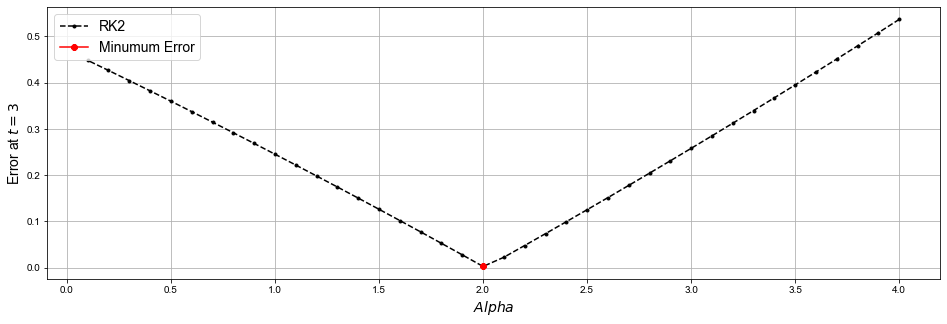

In [30]:
# problem parameters
dt = 0.1
y0 = 1.0
t0 = 0

def approx_error(dt, t_max, alpha):
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    err1 = abs(yall[-1]-y_ex(t_max))
    return err1

error_rk2 = []
alpha_array = []

# convergance for varrying alpha
alpha = 4
da = - 0.1
while alpha > 0:
    alpha_array.append(alpha)
    err1 = approx_error(dt, 3, alpha)
    error_rk2.append(err1)
    alpha = alpha + da 


#retrivinig the lowest error    
best_alpha = min(error_rk2)
alpha_min = alpha_array[error_rk2.index(best_alpha)]
#rounding it to nearest int
alpha_minn = round(alpha_min)

print('Minumum error is at value of', alpha_min, '≈ ', alpha_minn)

fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))
ax1.plot(alpha_array, error_rk2, 'k', linestyle='dashed', marker='.', label='RK2')
ax1.plot(alpha_min, best_alpha,'r', marker='8', label="Minumum Error")
ax1.set_xlabel('$Alpha$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
#ax1.set_title('Convergance plot'.format(dt), fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

## Convergence :
For the convergence of RK2_alpha the alpha value obtained from previous section was used.

Forward Euler scheme has an order of convergence of 1.

Improved Euler and RK2 have an order of convergence of 2.

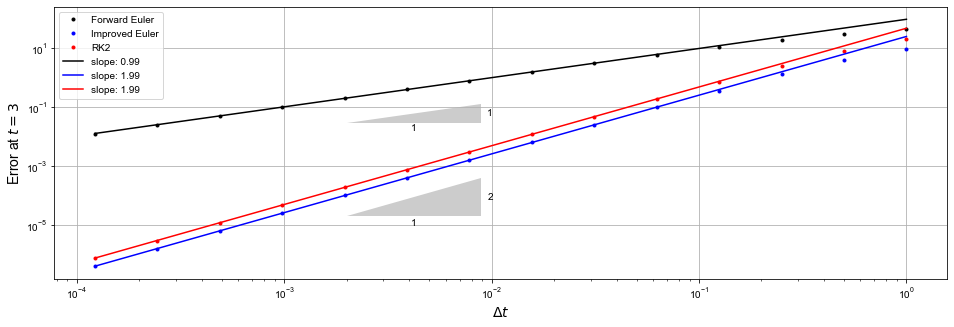

In [6]:
# problem parameters
dt = 0.5
y0 = 1.0
t0 = 0.0

def approx_error(dt, t_max):
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err1 = abs(yall[-1]-y_ex(tall[-1]))
    yall, tall = improved_euler(f, y0, t0, t_max, dt)
    err2 = abs(yall[-1]-y_ex(tall[-1]))
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha=best_alpha)
    err3 = abs(yall[-1]-y_ex(tall[-1]))
    return err1, err2, err3

error_fe = []
error_ie = []
error_rk2 = []
dt_array = []
dt = 1

while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk2.append(err3)
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))
ax1.loglog(dt_array, error_fe, 'k.', label='Forward Euler')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_rk2, 'r.', label='RK2')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

start_fit = 4

line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_rk2 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk2[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array, np.exp(line_fit_rk2[1]) * dt_array**(line_fit_rk2[0]), 'r-', label = 'slope: {:.2f}'.format(line_fit_rk2[0]))

annotation.slope_marker((2e-3, 3e-2), (1, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 2e-5), (2, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

<br> 

Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$.  ✅

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4. ✅

<br>

Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler. ✅

<br>

Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler. ✅

<br>

Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law. ✅

## Backwards Euler 

In [7]:
# problem parameters
dt = 0.01
y0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.

def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

def g(yn1, yn, dt, tn1, f):
    return yn +dt*f(tn1,yn1)

def picard(f, x, yn, dt, tn1, coupled_ODE, atol=1.0e-6):
    x_prev = x + 2*atol
    while np.all(abs(x - x_prev)) > atol:
        x_prev = x
        x = f(x_prev, yn, dt, tn1, coupled_ODE) 
    return x

def backward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        yguess = y + 0.1
        y_n = picard(g, yguess, y, dt, t0, f, atol=1.0e-7)
        y = y + dt*f(t, y_n)  
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

## Trapezoidal Scheme

In [8]:
def trapezoidal(f, y0, t0, t_max, dt):
    u = np.array(y0)
    t = np.array(t0)
    u_all = [y0]
    t_all = [t0]
    while t < t_max:
        uguess = u + 0.1
        root = picard(g, uguess, u, dt, t0, f, atol=1.0e-7)
        u_b = u + dt*f(t, root)
        u = u + 0.5*dt*f(t, u) + 0.5*dt*f(t, u_b)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

## Circular Orbits : 

Forward Euler under-estimates while the Backwards Euler over-estimates initially (affecting the radius of the circle accordingly). 

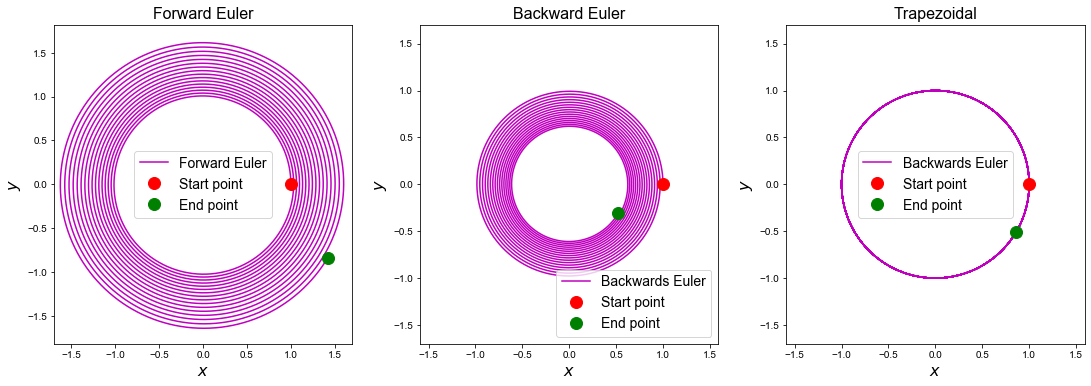

In [9]:
# setting up figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(w_pad=4)

u_forward, t_forward = forward_euler(f, y0, t0, t_max, dt)
ax1.plot(u_forward[:,0], u_forward[:,1], 'm', label='Forward Euler')
ax1.plot(u_forward[0,0], u_forward[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u_forward[-1,0], u_forward[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Forward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

u_backward, t_backward = backward_euler(f, y0, t0, t_max, dt)
ax2.plot(u_backward[:,0], u_backward[:,1], 'm', label='Backwards Euler')
ax2.plot(u_backward[0,0], u_backward[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u_backward[-1,0], u_backward[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Backward Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);

u_trapezoidal, t_trapezoidal = trapezoidal(f, y0, t0, t_max, dt)
ax3.plot(u_trapezoidal[:,0], u_trapezoidal[:,1], 'm', label='Backwards Euler')
ax3.plot(u_trapezoidal[0,0], u_trapezoidal[0,1], 'ro', label='Start point', markersize=12)
ax3.plot(u_trapezoidal[-1,0], u_trapezoidal[-1,1], 'go', label='End point', markersize=12)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('Trapezoidal', fontsize=16)
ax3.axis('equal')
ax3.legend(loc='best', fontsize=14)
ax3.set_xlim(-1.7,1.7)
ax3.set_ylim(-1.7,1.7);



## Conservation law

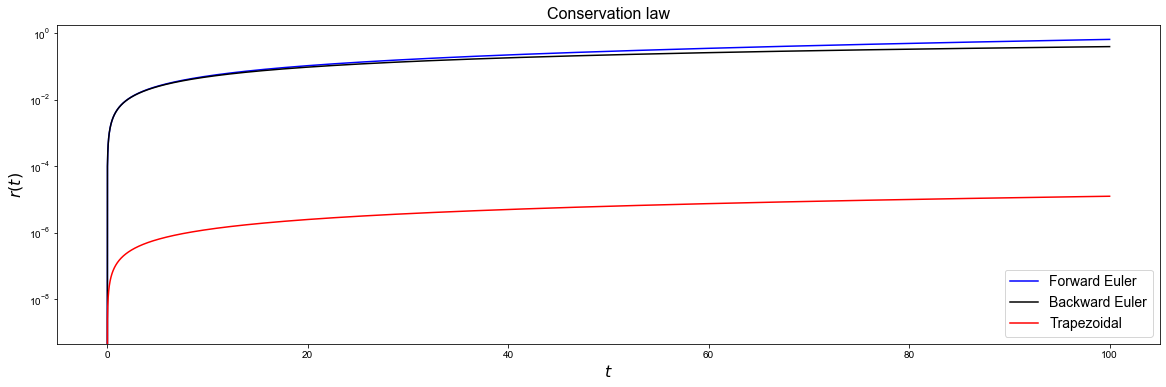

In [10]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

u, t = forward_euler(f, y0, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Forward Euler')

u, t = backward_euler(f, y0, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Backward Euler')

u, t = trapezoidal(f, y0, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'r', label='Trapezoidal')

ax1.legend(loc='best', fontsize=14);

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below). ✅

The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements. ✅

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by ✅

```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.



<br>

Do you observe the expected order of convergence? ✅

<br>

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe? ✅

<br>

Throughout this question you may assume for simplicity a uniform mesh.

##  Simpsons Rule & Hat Function

In [11]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    This implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also don't need the composite version of Simpson's rule here - want the version
    that is able to integrate over a single interval and evaluates the function
    at the two end points as well as the mid point.
    
    Note that this version of the function performs redundant function 
    evaluations.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

def hat_function(i, x_nodes):
    """ 
    (computes phi - the basis function)
    Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

## The Mass Matrix

In [12]:
def mass_matrix(x):
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag([0] * (len(x) -2), k=0) 
    M += np.diag([0.5] * (len(x) -1)   , k=-1) + np.diag([-0.5] * (len(x) -1)  , k=1)
    M[0,0] = -0.5
    M[-1,-1] = 0.5
    return M

## Solving the steady-state advection-diffusion problem with Dirichlet boundary conditions 

In [13]:
# Parameters 
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
uL = 0.
uR = CE

# used for verification
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

def f(x):
    return 0.0

N_elements_CG = 81
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG)
dx = np.diff(x_nodes)

# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
Mass = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)
K *= kappa

# constructing the mass matrix
Mass_mtrx = mass_matrix(x_nodes)

# grabbing the internal part of the matrix with Dirichlet conditions
Mass = Mass_mtrx[1:-1,1:-1]
Mass *= U

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
    
# Add in the extra entries due to the inhomogeneous BCs
# At the left the integral is only non-zero when phi_i and phi_0 both have
# support - this only occurs over the first element when i=1 (remembering that i=0
# isn't in our trial space. The integrand is then
# uL multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
# multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
# This is a constant, and hence to do the integral we just need to 
# multiply by the size of the cell (dx[0]):
RHS[0] = RHS[0] - (uL * 1/dx[0] * (-1/dx[0]))*dx[0] * kappa - uL * (0.5) * U

# and similarly for the RHS
RHS[-1] = RHS[-1] - (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] * kappa - uR * (0.5) * U

Disc = (K - Mass)
u = sl.solve(Disc, RHS)

## Verification 

error (RMS at nodes only) =  0.00020208093637835085


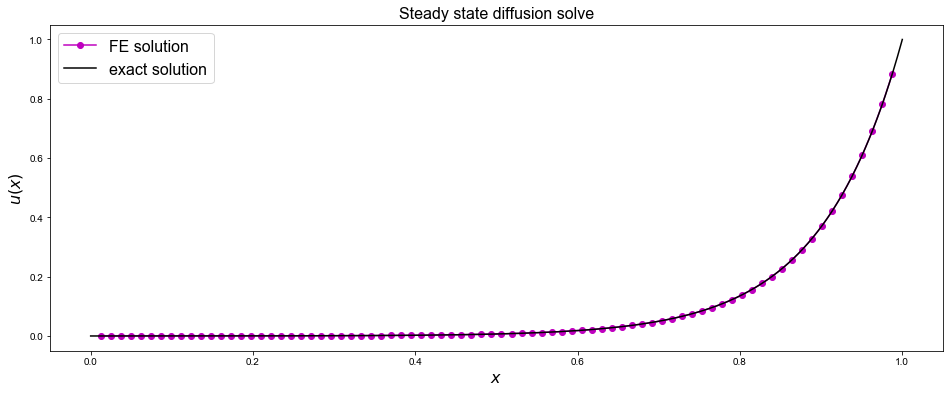

In [14]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'mo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

## Comparison:

The plot verifies that my solver is getting similar results to the Central Difference solver hence qualitatively is correct.

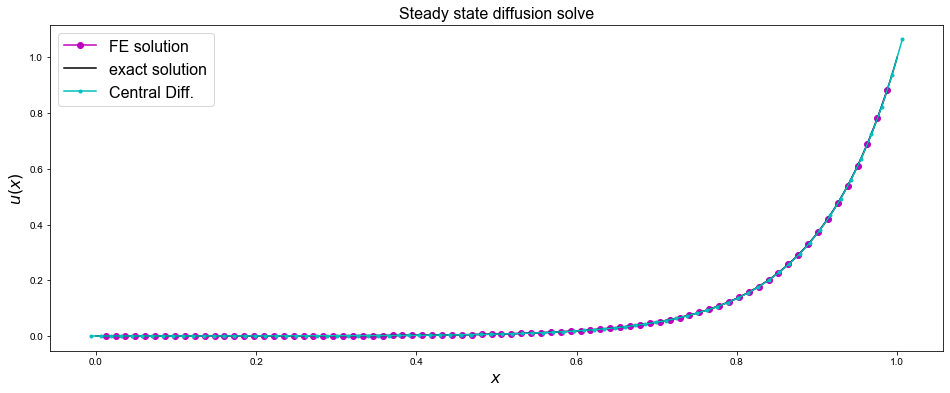

In [15]:
def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C

diff_x, diff_C = BVP_AD_central(L, U, kappa, CE, N_elements_CG-3)

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'mo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.plot(diff_x, diff_C, 'c', marker='.' ,label='Central Diff.')
ax1.legend(loc='best', fontsize=16);

## Convergence

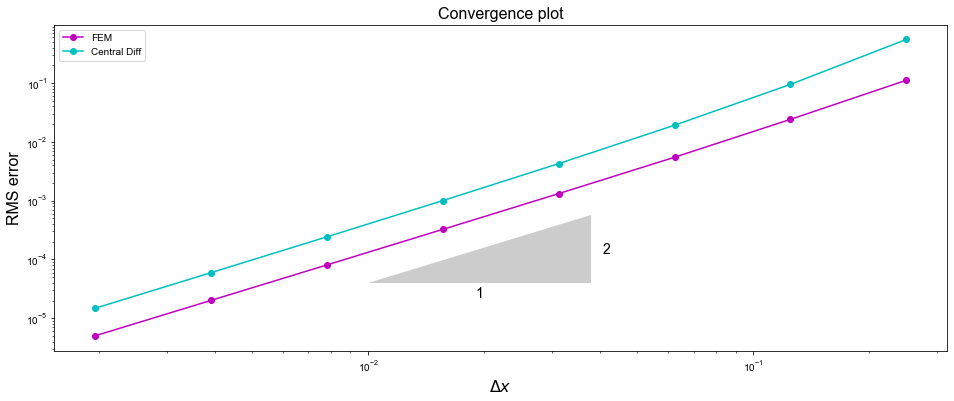

In [16]:
# a function to reconstruct the p/w linear function
def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

# some meshes of increasingly finer resolution to loop over
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG)
    dx = np.diff(x_nodes)

    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    Mass = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)
    K *= kappa

    # constructing the mass matrix
    Mass_mtrx = mass_matrix(x_nodes)

    # grabbing the internal part of the matrix with Dirichlet conditions
    Mass = Mass_mtrx[1:-1,1:-1]
    Mass *= U

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        # simpsons with number intervals = 2 can integrate this exactly
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    RHS[0] = RHS[0] - (uL * 1/dx[0] * (-1/dx[0]))*dx[0] * kappa - uL * (0.5) * U

    # and similarly for the RHS
    RHS[-1] = RHS[-1] - (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] * kappa - uR * (0.5) * U

    Disc = (K - Mass)
    u = sl.solve(Disc, RHS)
    diff_x, diff_C = BVP_AD_central(L, U, kappa, CE, N_elements_CG)


    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    errors[1,i] = sl.norm(diff_C - u_exact(diff_x)) / np.sqrt(len(diff_C))
    
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'mo-', label='FEM')
ax1.loglog(1./np.array(Ns), errors[1,:], 'co-', label='Central Diff')


ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax1.legend(loc='best')

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion. ✅

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and generalise it to include advection.  ✅

Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.  ✅


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].  ✅

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.  ✅

In [17]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh (somehow) compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

def shape(N_loc, N_gi):
    """ Define reference shape functions at N_gi quadrature points.
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros((N_loc, N_gi))
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Compute derivatives of shape functions.
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros((N_loc, N_gi))
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution seen above in the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

def quadrature(N_gi):
    """ Define quadrature rule on N_gi Gauss points
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight 

In [18]:
def assembly_local(M, K, A, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly - looping over products of the local nodes.
    matrix M - the mass matrix, 
    matrix K - the diffusion discretisation.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # quadrature
            # 'weight' is the quadrature weight - for Simpson's rule
            # includes the Jacobian det.
            phi_phi = 0.
            phix_phix = 0.
            phix_phi = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] # dx here is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                phix_phi += weight[gi] * phi[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix
            A[i_global, j_global] = A[i_global, j_global] + phix_phi

def assembly_global(M, K, T, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly - looping over elements.
    """
    # looping over all elements
    for element in range(N_elements_CG):
        # computing the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # performing local assembly & updating the M and K matrices
        assembly_local(M, K, T, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

In [19]:
def apply_bcs(Disc, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    bc_option==0 Homogeneous Neumann
    bc_option==1 Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        Disc[0,0] = big_spring            
        b[0]   = big_spring * lbc
        Disc[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')
        
def initial_condition(U, kappa, x0, x, t, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return adv_diff_analytical_solution(U, kappa, x0, x, t)
    else:
        raise Exception('Option not implemented.')
      

In [20]:
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)


In [21]:
def advection_diffiusion_FEM(Lx=3, kappa=0.01, U=1., N_nodes_CG=101, dt=0.001, t_end=1, theta=1, x0=0.5):
    
    assert t_end > 0.05 # minimum simulation time of greater than 0.05 s required

    start_time = time()
    
    # mesh data
    N_elements_CG = N_nodes_CG - 1

    # define some numerical parameters
    N_loc = 2
    N_gi = 3

    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)

    # start time
    t = 0.05
    
    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    u_ic = initial_condition(U, kappa, x0, x_nodes, t)
    phi = shape(N_loc, N_gi)
    
    # quadrature weights
    weight = quadrature(N_gi)
    
    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    T = np.zeros((N_nodes_CG, N_nodes_CG))
    
    # assemble the individual discretisation matrices
    assembly_global(M, K, T, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)
    
    # and combine them into our final matrix system
    A = M + dt * theta * (kappa * K) + dt * theta * (U * T)
    RHS_matrix = M - dt * (1-theta) * (kappa * K) - dt * (1-theta) * (U * T)
    
    # and finally time step
    u_old = np.copy(u_ic)

    while t < t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(A, b, 0, 0, bc_option=0)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt

    r = kappa*dt/(np.min(dx)**2)
    Co = U * dt / min(dx)
    
    # printing  
    print('Simulation time:', t)
    print('Wall time:', (time() - start_time))
    print('R parameter =', r)
    print('Courant number =', Co)
    print('Cell Pe =', Co/r, '\n\n')
    
    return u, t, x_nodes, dx

## Test Simulation


In [26]:
# domain size
Lx = 3.
kappa = 0.01

U = 1.
theta = 0.5
x0 = 0.5
t_ends = np.array([0.051, 0.1, 0.2, 0.4, 0.6, 0.8, 1.])

u_all = []
u_exact_all = []

print('--- TESTING ---\n')
for t_end in t_ends:
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=391, dt=0.001, t_end=t_end, theta=theta, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t_end)

    u_all.append(np.array(u))
    u_exact_all.append(np.array(u_exact))
print('--- FIN ---')

--- TESTING ---

Simulation time: 0.051000000000000004
Wall time: 0.025432825088500977
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


Simulation time: 0.10000000000000005
Wall time: 0.12245988845825195
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


Simulation time: 0.20000000000000012
Wall time: 0.24298787117004395
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


Simulation time: 0.4000000000000003
Wall time: 0.5145738124847412
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


Simulation time: 0.6000000000000004
Wall time: 0.9411001205444336
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


Simulation time: 0.8000000000000006
Wall time: 1.0093891620635986
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048

## Graphing 

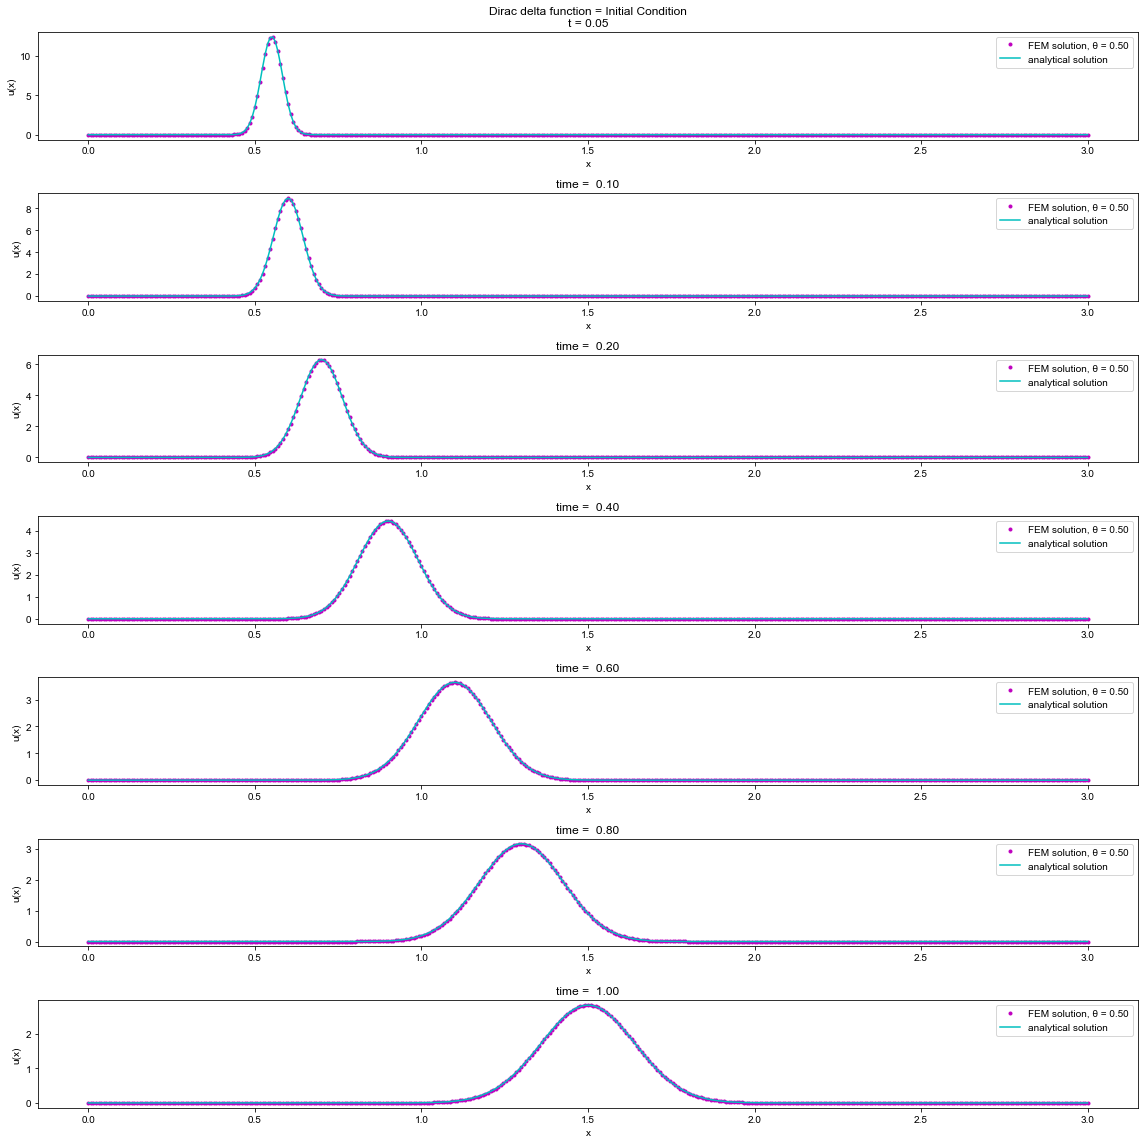

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(16, 16))

ax1.plot(x_nodes, u_all[0], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax1.plot(x_nodes, u_exact_all[0], 'c',label='analytical solution')
ax1.set_title('Dirac delta function = Initial Condition\nt = %.2f' % t_ends[0])
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.legend()

ax2.plot(x_nodes, u_all[1], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax2.plot(x_nodes, u_exact_all[1], 'c',label='analytical solution')
ax2.set_title('time =  %.2f' % t_ends[1])
ax2.set_xlabel('x')
ax2.set_ylabel('u(x)')
ax2.legend()

ax3.plot(x_nodes, u_all[2], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax3.plot(x_nodes, u_exact_all[2], 'c',label='analytical solution')
ax3.set_title('time =  %.2f' % t_ends[2])
ax3.set_xlabel('x')
ax3.set_ylabel('u(x)')
ax3.legend()

ax4.plot(x_nodes, u_all[3], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax4.plot(x_nodes, u_exact_all[3], 'c',label='analytical solution')
ax4.set_title('time =  %.2f' % t_ends[3])
ax4.set_xlabel('x')
ax4.set_ylabel('u(x)')
ax4.legend()

ax5.plot(x_nodes, u_all[4], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax5.plot(x_nodes, u_exact_all[4], 'c',label='analytical solution')
ax5.set_title('time =  %.2f' % t_ends[4])
ax5.set_xlabel('x')
ax5.set_ylabel('u(x)')
ax5.legend()

ax6.plot(x_nodes, u_all[5], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax6.plot(x_nodes, u_exact_all[5], 'c',label='analytical solution')
ax6.set_title('time =  %.2f' % t_ends[5])
ax6.set_xlabel('x')
ax6.set_ylabel('u(x)')
ax6.legend()

ax7.plot(x_nodes, u_all[6], 'mo', label='FEM solution, \u03B8 = %.2f' % theta, marker='.')
ax7.plot(x_nodes, u_exact_all[6], 'c',label='analytical solution')
ax7.set_title('time =  %.2f' % t_ends[6])
ax7.set_xlabel('x')
ax7.set_ylabel('u(x)')
ax7.legend()

fig.tight_layout()


## Theta Convergence:

Has a linear relationship - error decreases with increasing theta ($\theta$)

In [24]:
# domain size
Lx = 3.
kappa = 0.01

U = 1.
x0 = 0.5
N_nodes_CG = 391
thetas = np.linspace(0, 1, 11)

err_theta = []

print('--- THETA_CONVERGENCE ---\n')

for theta in thetas:
    print('theta =', theta)
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_nodes_CG, dt=0.001, t_end=1, theta=theta, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, np.linspace(1, N_nodes_CG, N_nodes_CG), t)
    
    err_theta.append(sl.norm(u - u_exact) /np.sqrt(len(u)))
print('--- FIN ---')

--- THETA_CONVERGENCE ---

theta = 0.0
Simulation time: 1.0000000000000007
Wall time: 1.4177920818328857
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


theta = 0.1
Simulation time: 1.0000000000000007
Wall time: 1.1498911380767822
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


theta = 0.2
Simulation time: 1.0000000000000007
Wall time: 1.1533241271972656
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


theta = 0.30000000000000004
Simulation time: 1.0000000000000007
Wall time: 1.149811029434204
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


theta = 0.4
Simulation time: 1.0000000000000007
Wall time: 1.150507926940918
R parameter = 0.1690000000000012
Courant number = 0.13000000000000048
Cell Pe = 0.7692307692307666 


theta = 0.5
Simulation time: 1.0000000000000007
Wall time: 

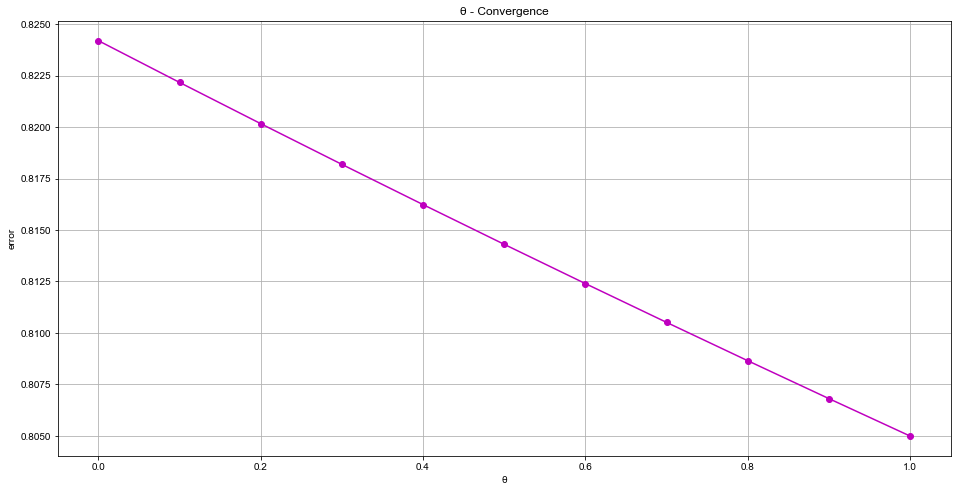

In [25]:
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(111)

ax1.plot(thetas, err_theta, 'mo-')
ax1.set_title('\u03B8 - Convergence')
ax1.set_xlabel('\u03B8')
ax1.set_ylabel('error')
ax1.grid()


## Spacial / Times-step convergence

### Forward Euler :

Spacial order of convergence of 2

Time order of covergence of 1


In [12]:
#Parameters
Lx = 3.
kappa = 0.01
U = 1.
x0 = 0.5
N_nodes_CG = 391

dts_FE = np.logspace(-3.6, -4.5, 5)
dxs_FE = []
N_xs_FE = np.array(np.logspace(1.5, 2.593, 10), int)

err_dx_FE = []
err_dt_FE = []

print('--- SPACIAL_CONVERGENCE ---\n')
for N_x in N_xs_FE:
    print('dx =', Lx/(N_x-1))
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_x, dt=0.00001, t_end=1, theta=0, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dx_FE.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
    dxs_FE.append(min(dx))

print('--- TIME-STEP_CONVERGENCE ---\n')
for dt in dts_FE:
    print('dt =', dt)
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_nodes_CG, dt=dt, t_end=1, theta=0., x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dt_FE.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
print('--- FIN ---')

--- SPACIAL_CONVERGENCE ---

dx = 0.1
Simulation time: 1.0000099999980792
Wall time: 6.719789266586304
R parameter = 1.0000000000000072e-05
Courant number = 0.00010000000000000036
Cell Pe = 9.999999999999964 


dx = 0.075
Simulation time: 1.0000099999980792
Wall time: 8.447692155838013
R parameter = 1.7777777777777905e-05
Courant number = 0.00013333333333333383
Cell Pe = 7.499999999999974 


dx = 0.05555555555555555
Simulation time: 1.0000099999980792
Wall time: 9.613322019577026
R parameter = 3.240000000000023e-05
Courant number = 0.00018000000000000066
Cell Pe = 5.555555555555536 


dx = 0.041666666666666664
Simulation time: 1.0000099999980792
Wall time: 12.360790967941284
R parameter = 5.760000000000041e-05
Courant number = 0.00024000000000000087
Cell Pe = 4.166666666666652 


dx = 0.031578947368421054
Simulation time: 1.0000099999980792
Wall time: 15.864971160888672
R parameter = 0.00010027777777777998
Courant number = 0.00031666666666667017
Cell Pe = 3.1578947368420707 


dx = 0.0

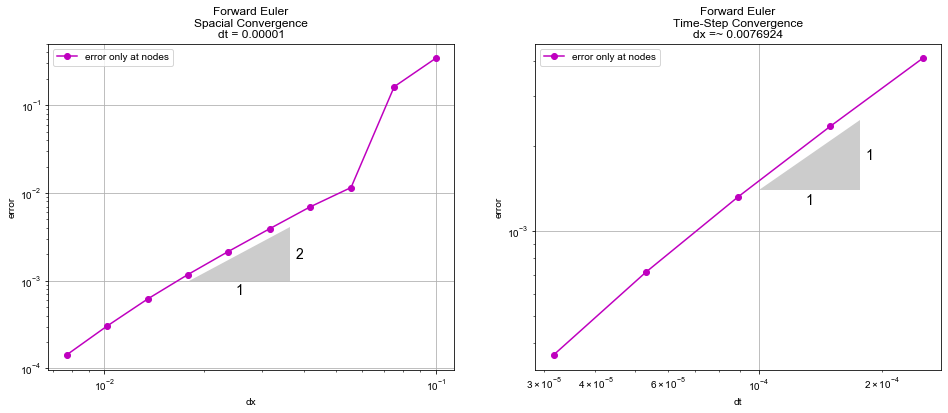

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.loglog(dxs_FE, err_dx_FE, 'mo-', label='error only at nodes')
ax1.set_title('Forward Euler\nSpacial Convergence\ndt = 0.00001')
ax1.set_xlabel('dx')
ax1.set_ylabel('error')
ax1.grid()
ax1.legend()
annotation.slope_marker((10e-3*1.8, 10e-4), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax2.loglog(dts_FE, err_dt_FE, 'mo-', label='error only at nodes')
ax2.set_title('Forward Euler\nTime-Step Convergence\ndx =~ 0.0076924')
ax2.set_xlabel('dt')
ax2.set_ylabel('error')
ax2.grid()
ax2.legend()
annotation.slope_marker((10e-5, 10e-4*1.4), (1, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


### Backward Euler :

Time order of covergence of 1

In [14]:
#Parameters
Lx = 3.
kappa = 0.01
U = 1.
x0 = 0.5
N_nodes_CG = 301

dts_IE = np.logspace(-1, -5, 10)
dxs_IE = []
N_xs_IE = np.array(np.logspace(1, 3, 10), int)

err_dx_IE = []
err_dt_IE = []

print('--- SPACIAL_CONVERGENCE ---\n')
for N_x in N_xs_IE:
    print('dx =', Lx/(N_x-1))
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_x, dt=0.001, t_end=1, theta=1, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dx_IE.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
    dxs_IE.append(min(dx))

print('--- TIME-STEP_CONVERGENCE ---\n')
for dt in dts_IE:
    print('dt =', dt)
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_nodes_CG, dt=dt, t_end=1, theta=1, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dt_IE.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
print('--- FIN ---')

--- SPACIAL_CONVERGENCE ---

dx = 0.3333333333333333
Simulation time: 1.0000000000000007
Wall time: 0.05256223678588867
R parameter = 9.000000000000017e-05
Courant number = 0.0030000000000000027
Cell Pe = 33.3333333333333 


dx = 0.2
Simulation time: 1.0000000000000007
Wall time: 0.057270050048828125
R parameter = 0.00025000000000000066
Courant number = 0.005000000000000007
Cell Pe = 19.999999999999975 


dx = 0.11538461538461539
Simulation time: 1.0000000000000007
Wall time: 0.07154178619384766
R parameter = 0.0007511111111111166
Courant number = 0.008666666666666697
Cell Pe = 11.538461538461496 


dx = 0.06666666666666667
Simulation time: 1.0000000000000007
Wall time: 0.09141373634338379
R parameter = 0.002250000000000016
Courant number = 0.015000000000000053
Cell Pe = 6.666666666666643 


dx = 0.039473684210526314
Simulation time: 1.0000000000000007
Wall time: 0.1543428897857666
R parameter = 0.006417777777777847
Courant number = 0.025333333333333468
Cell Pe = 3.94736842105261 


dx

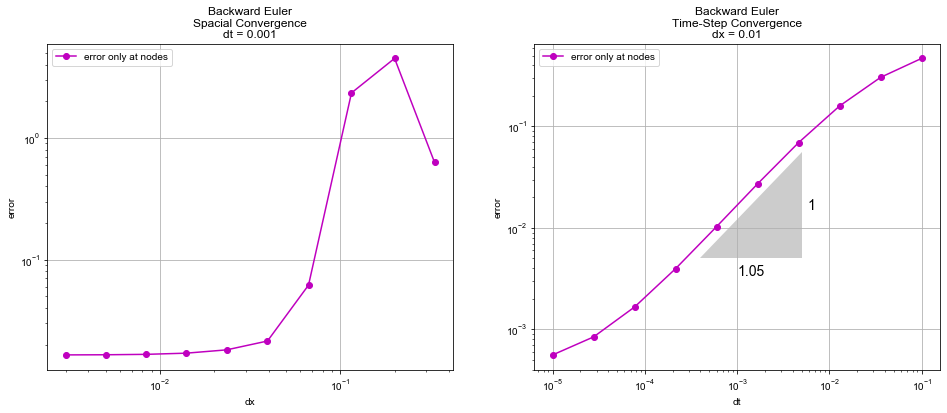

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.loglog(dxs_IE, err_dx_IE, 'mo-', label='error only at nodes')
ax1.set_title('Backward Euler\nSpacial Convergence\ndt = 0.001')
ax1.set_xlabel('dx')
ax1.set_ylabel('error')
ax1.grid()
ax1.legend()

ax2.loglog(dts_IE, err_dt_IE, 'mo-', label='error only at nodes')
ax2.set_title('Backward Euler\nTime-Step Convergence\ndx = 0.01')
ax2.set_xlabel('dt')
ax2.set_ylabel('error')
ax2.grid()
ax2.legend()
annotation.slope_marker((10e-5*4, 10e-3*0.5), (1, 1.05), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

### Crank-Nicolson :

Spacial order of convergence of 2

Time order of covergence of 1



In [10]:
Lx = 3.
kappa = 0.01
U = 1.
x0 = 0.5
N_nodes_CG = 301

dts_CN = np.logspace(-1, -3, 10)
dxs_CN = []
N_xs_CN = np.array(np.logspace(1, 3, 10), int)

err_dx_CN = []
err_dt_CN = []

print('--- SPACIAL_CONVERGENCE ---\n')
for N_x in N_xs_CN:
    print('dx =', Lx/(N_x-1))
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_x, dt=0.001, t_end=1, theta=0.5, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dx_CN.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
    dxs_CN.append(min(dx))

print('--- TIME-STEP_CONVERGENCE ---\n')
for dt in dts_CN:
    print('dt =', dt)
    u, t, x_nodes, dx = advection_diffiusion_FEM(Lx=Lx, kappa=kappa, U=U, N_nodes_CG=N_nodes_CG, dt=dt, t_end=1, theta=0.5, x0=x0)
    u_exact = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    err_dt_CN.append(sl.norm(u - u_exact) /np.sqrt(len(u))) # RMS at nodes only
print('--- FIN ---')

--- SPACIAL_CONVERGENCE ---

dx = 0.3333333333333333
Simulation time: 1.0000000000000007
Wall time: 0.0589292049407959
R parameter = 9.000000000000017e-05
Courant number = 0.0030000000000000027
Cell Pe = 33.3333333333333 


dx = 0.2
Simulation time: 1.0000000000000007
Wall time: 0.054741859436035156
R parameter = 0.00025000000000000066
Courant number = 0.005000000000000007
Cell Pe = 19.999999999999975 


dx = 0.11538461538461539
Simulation time: 1.0000000000000007
Wall time: 0.06324601173400879
R parameter = 0.0007511111111111166
Courant number = 0.008666666666666697
Cell Pe = 11.538461538461496 


dx = 0.06666666666666667
Simulation time: 1.0000000000000007
Wall time: 0.08597087860107422
R parameter = 0.002250000000000016
Courant number = 0.015000000000000053
Cell Pe = 6.666666666666643 


dx = 0.039473684210526314
Simulation time: 1.0000000000000007
Wall time: 0.11845779418945312
R parameter = 0.006417777777777847
Courant number = 0.025333333333333468
Cell Pe = 3.94736842105261 


dx

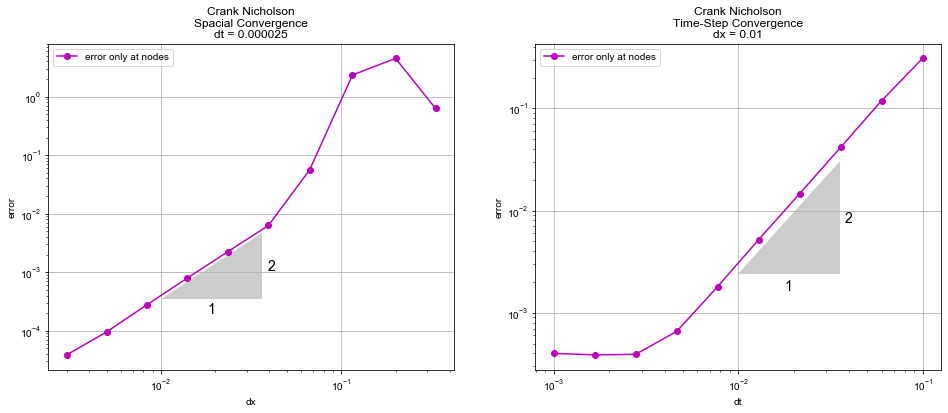

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.loglog(dxs_CN, err_dx_CN, 'mo-', label='error only at nodes')
ax1.set_title('Crank Nicholson\nSpacial Convergence\ndt = 0.000025')
ax1.set_xlabel('dx')
ax1.set_ylabel('error')
ax1.grid()
ax1.legend()
annotation.slope_marker((10e-3, 10e-4*0.35), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax2.loglog(dts_CN, err_dt_CN, 'mo-', label='error only at nodes')
ax2.set_title('Crank Nicholson\nTime-Step Convergence\ndx = 0.01')
ax2.set_xlabel('dt')
ax2.set_ylabel('error')
ax2.grid()
ax2.legend()
annotation.slope_marker((10e-3, 10e-4*2.4), (2, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
